In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.shape

(8523, 12)

In [6]:
test.shape

(5681, 11)

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [12]:
train["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**EDA**

In [16]:
bar=train['Item_Fat_Content'].value_counts()
bar

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

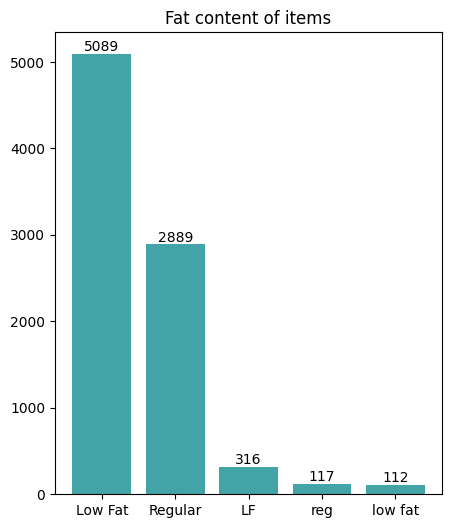

In [17]:
plt.figure(figsize=(5,6))
plt.bar(bar.index,bar.values,color='#42a4a6')
plt.title("Fat content of items")
for i, count in enumerate(bar):
    plt.text(i, count, str(count), ha="center", va="bottom")

Text(0.5, 1.0, 'Item Categories')

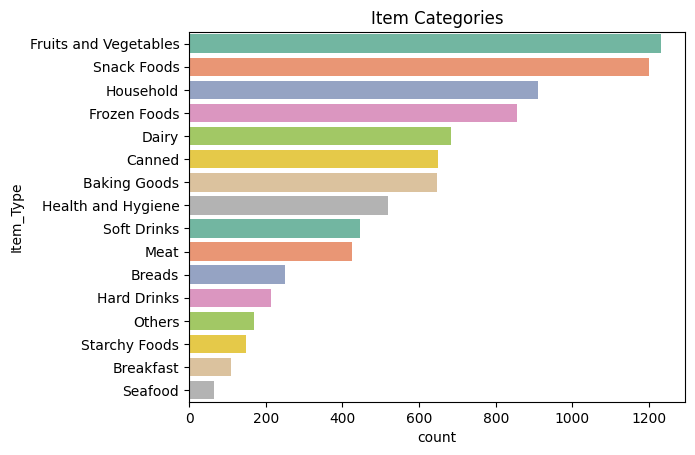

In [18]:
sns.countplot(y="Item_Type",data=train,palette="Set2",order=train['Item_Type'].value_counts().index)
plt.title("Item Categories")

In [19]:
a=train.Outlet_Type.value_counts()
b=train.Outlet_Location_Type.value_counts()
c=train.Outlet_Identifier.value_counts()

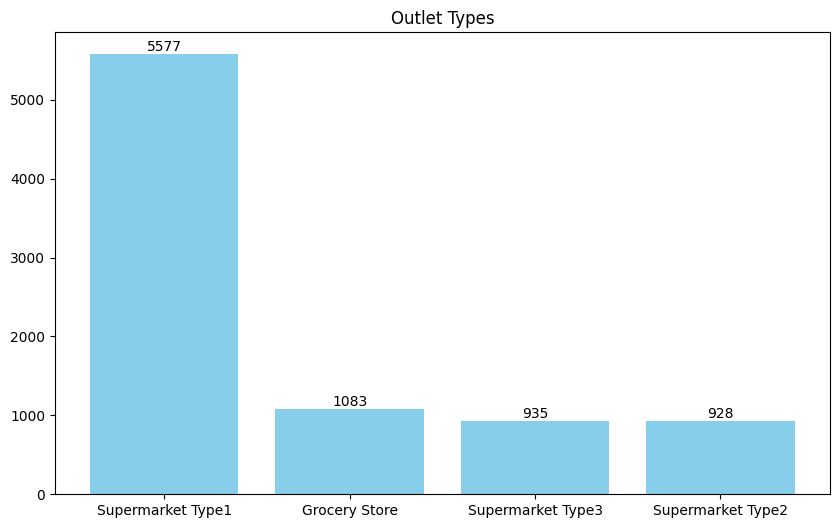

In [20]:
plt.figure(figsize=(10,6))
plt.bar(a.index,a.values,color='skyblue')
plt.title("Outlet Types")
for i, count in enumerate(a):
    plt.text(i, count, str(count), ha="center", va="bottom")

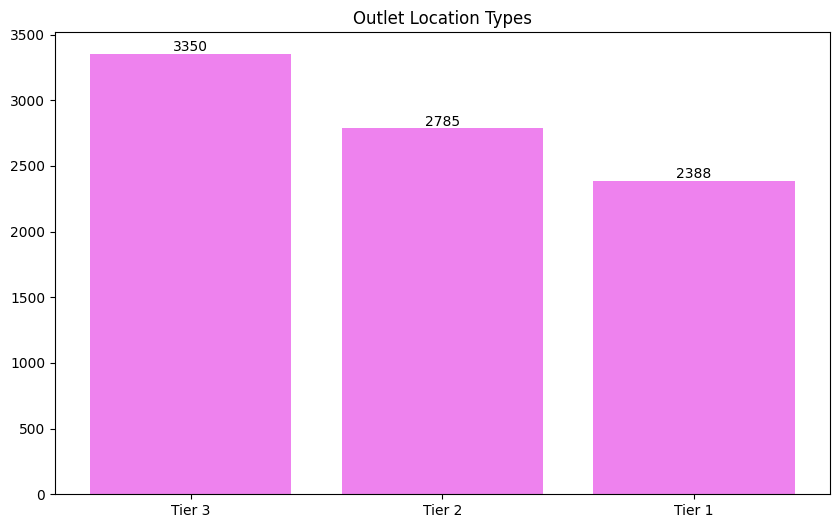

In [21]:
plt.figure(figsize=(10,6))
plt.bar(b.index,b.values,color='violet')
plt.title("Outlet Location Types")
for i, count in enumerate(b):
    plt.text(i, count, str(count), ha="center", va="bottom")

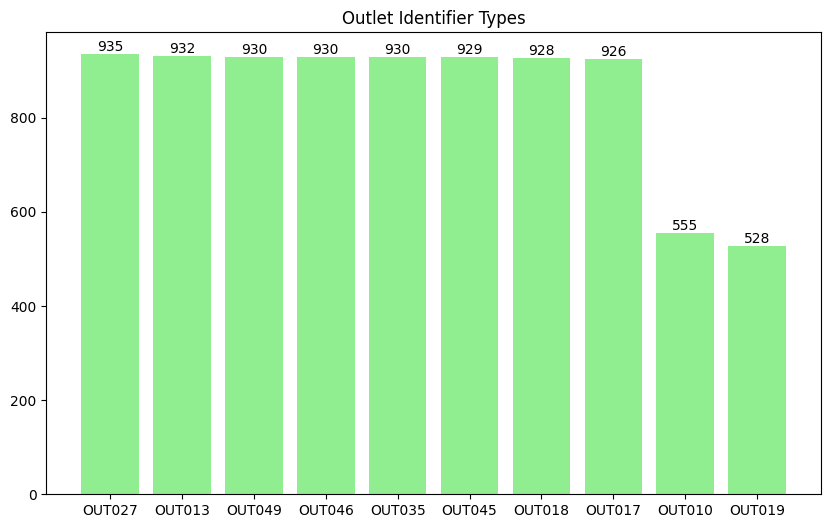

In [22]:
plt.figure(figsize=(10,6))
plt.bar(c.index,c.values,color='lightgreen')
plt.title("Outlet Identifier Types")
for i, count in enumerate(c):
    plt.text(i, count, str(count), ha="center", va="bottom")

Text(0.5, 1.0, 'Fat content of every Category')

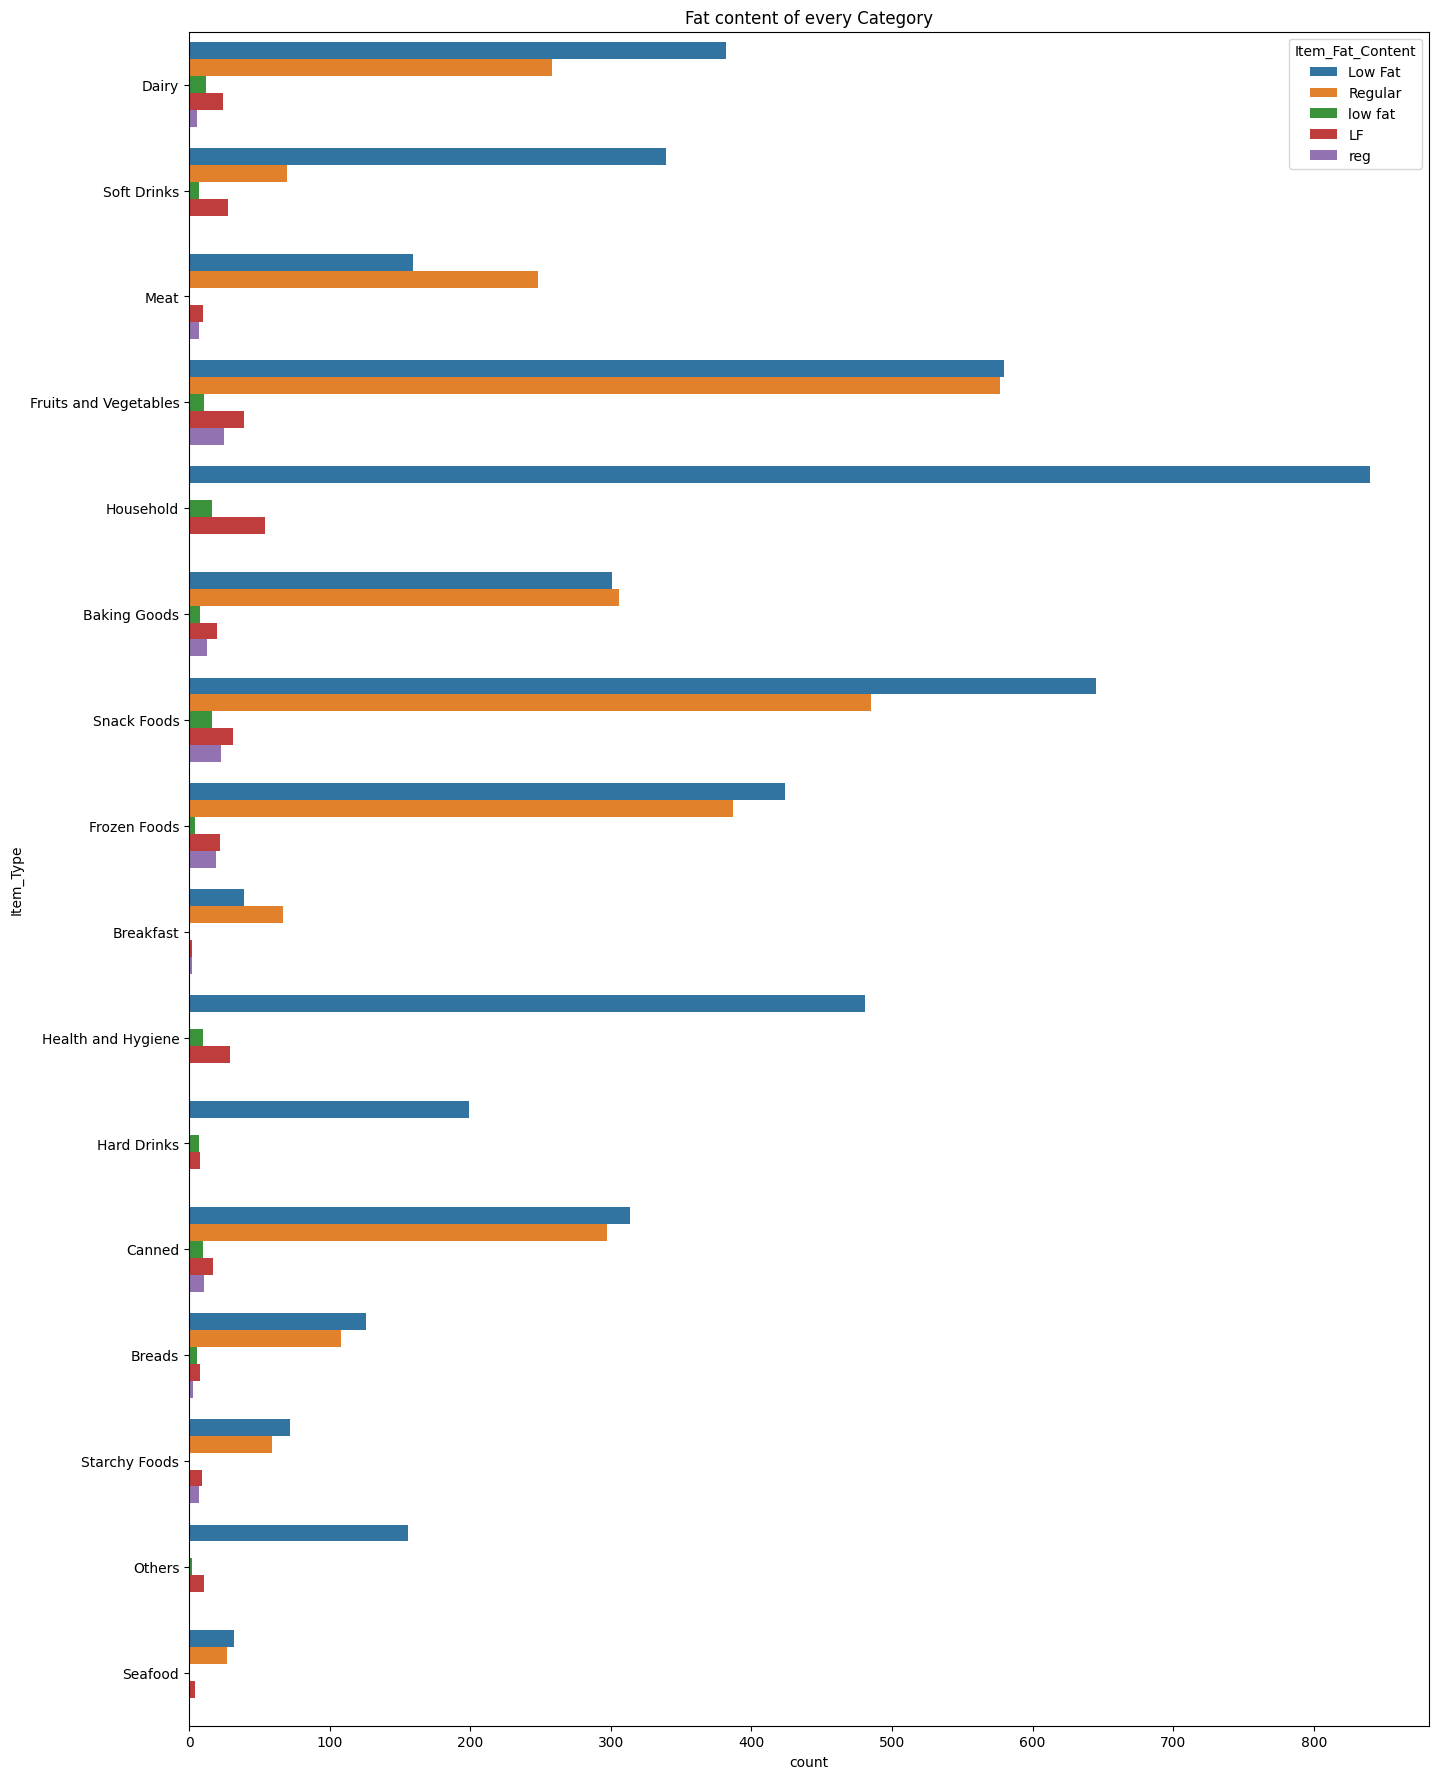

In [23]:
plt.figure(figsize=(16,22))
sns.countplot(y="Item_Type",hue="Item_Fat_Content",data=train,)
plt.title("Fat content of every Category")

**LF, low fat should come under Low Fat and reg is also should be under Regular. So, lets replace them**

In [24]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

train['Item_Fat_Content'].replace({'Regular':"Regular Fat"},inplace=True)

In [25]:
bar1=train.Item_Fat_Content.value_counts()

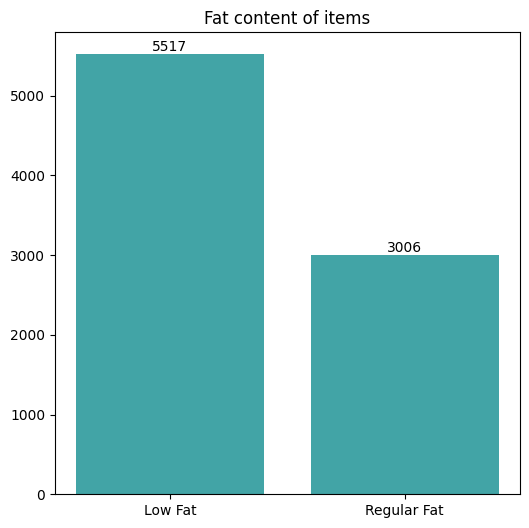

In [26]:
plt.figure(figsize=(6,6))
plt.bar(bar1.index,bar1.values,color='#42a4a6')
plt.title("Fat content of items")
for i, count in enumerate(bar1):
    plt.text(i, count, str(count), ha="center", va="bottom")

In [27]:
bar2=train.Outlet_Size.value_counts()

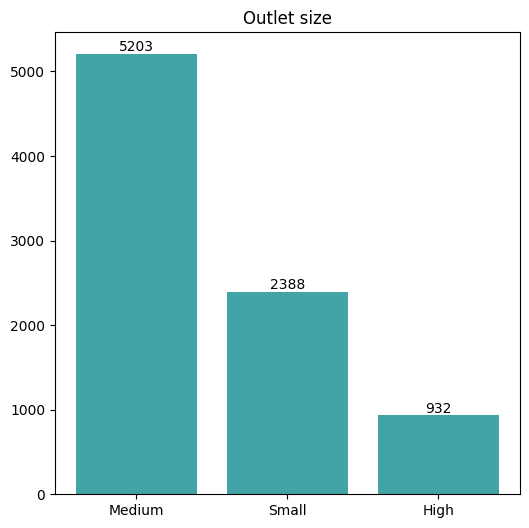

In [28]:
plt.figure(figsize=(6,6))
plt.bar(bar2.index,bar2.values,color='#42a4a6')
plt.title("Outlet size")
for i, count in enumerate(bar2):
    plt.text(i, count, str(count), ha="center", va="bottom")

In [29]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

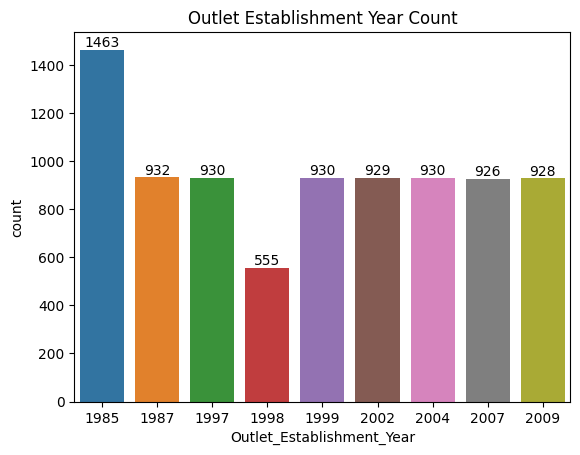

In [30]:
ax = sns.countplot(x='Outlet_Establishment_Year', data=train)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Outlet Establishment Year Count')
plt.show()

Text(0.5, 1.0, 'Fat content of every Category')

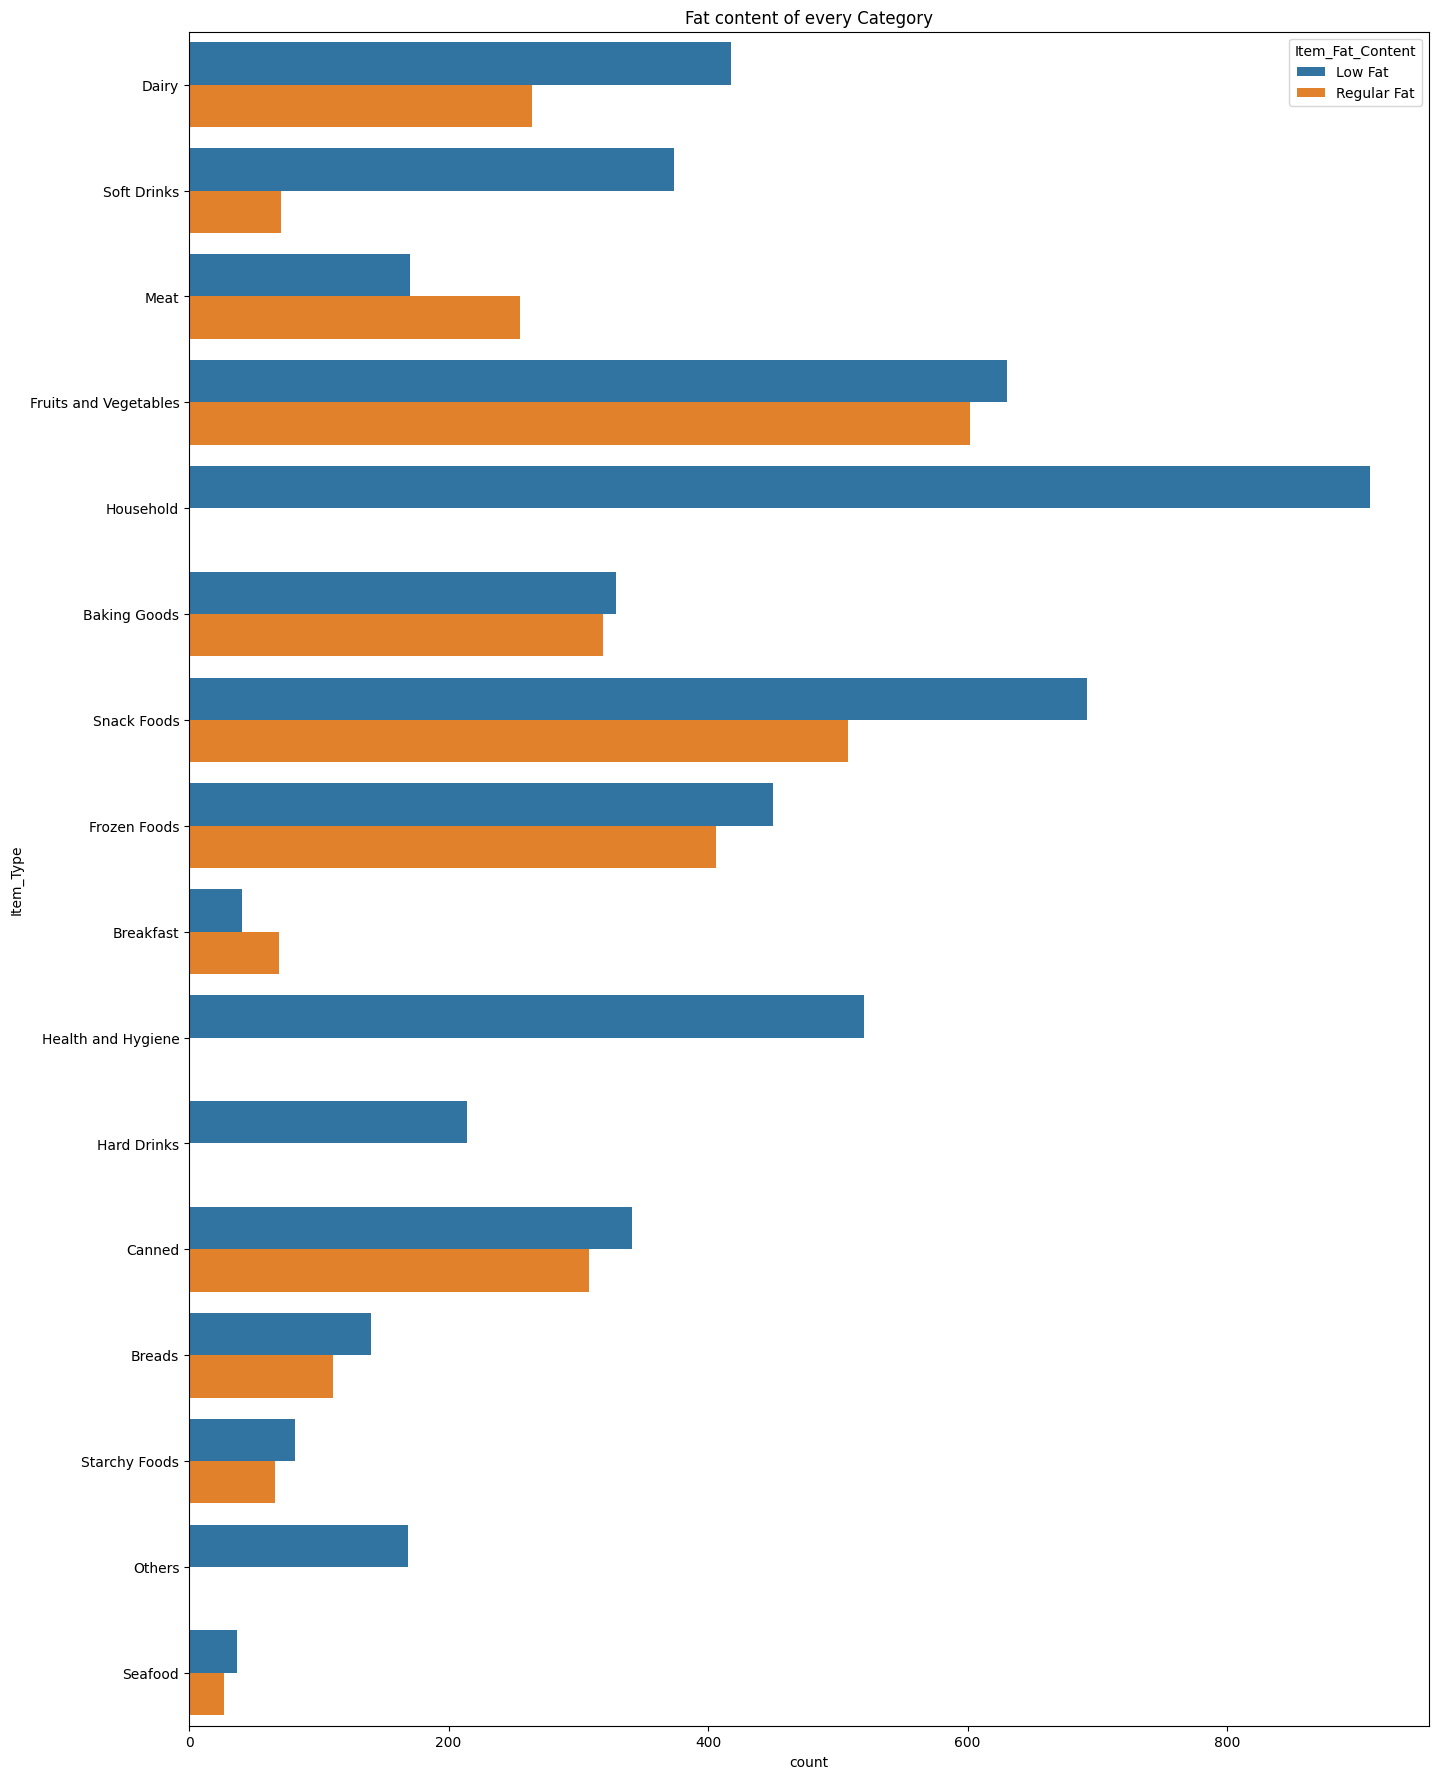

In [31]:
plt.figure(figsize=(16,22))
sns.countplot(y="Item_Type",hue="Item_Fat_Content",data=train,)
plt.title("Fat content of every Category")

In [32]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
grouped = train.groupby('Outlet_Location_Type')
sum_by_category = grouped['Outlet_Size'].value_counts()

# Print the result
sum_by_category

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Medium         1855
                      Small           930
Tier 3                Medium         2418
                      High            932
Name: count, dtype: int64

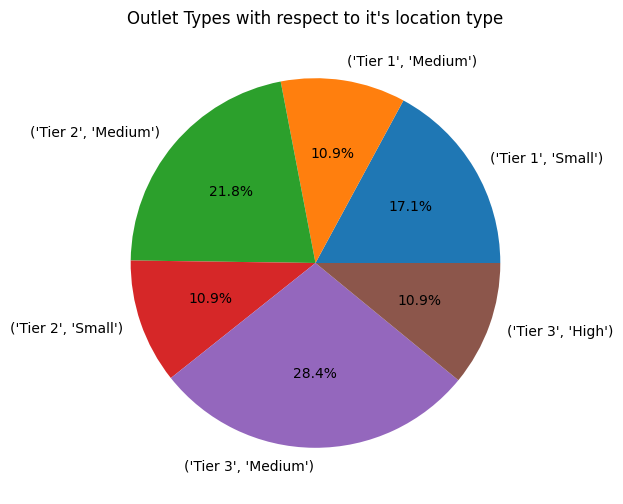

In [34]:
plt.figure(figsize=(12,6))
plt.pie(sum_by_category,labels=sum_by_category.index, autopct='%1.1f%%')
#plt.legend(sum_by_category.index, loc=0)
plt.title("Outlet Types with respect to it's location type")
plt.show()

In [35]:
grouped1 = train.groupby('Outlet_Type')
sum_by_category1 = grouped1['Outlet_Size'].value_counts()

# Print the result
sum_by_category1 

Outlet_Type        Outlet_Size
Grocery Store      Medium          555
                   Small           528
Supermarket Type1  Medium         2785
                   Small          1860
                   High            932
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

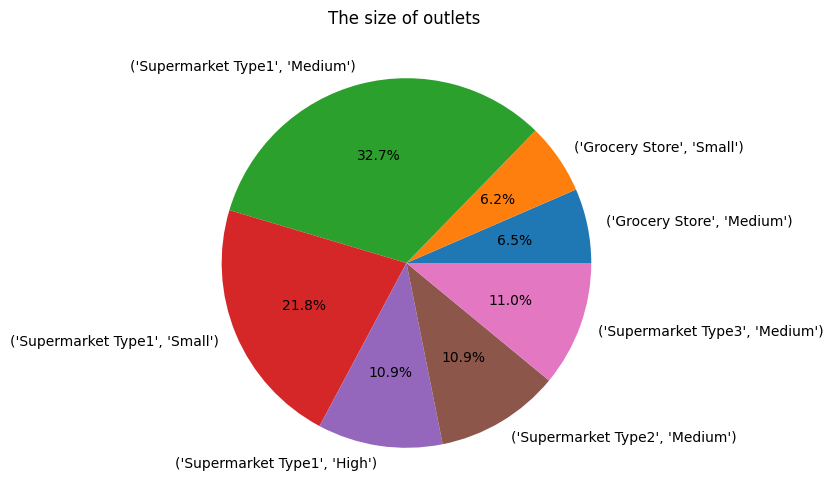

In [36]:
plt.figure(figsize=(12,6))
plt.pie(sum_by_category1,labels=sum_by_category1.index, autopct='%1.1f%%')
plt.title("The size of outlets ")
#plt.legend(sum_by_category.index, loc=0)
plt.show()

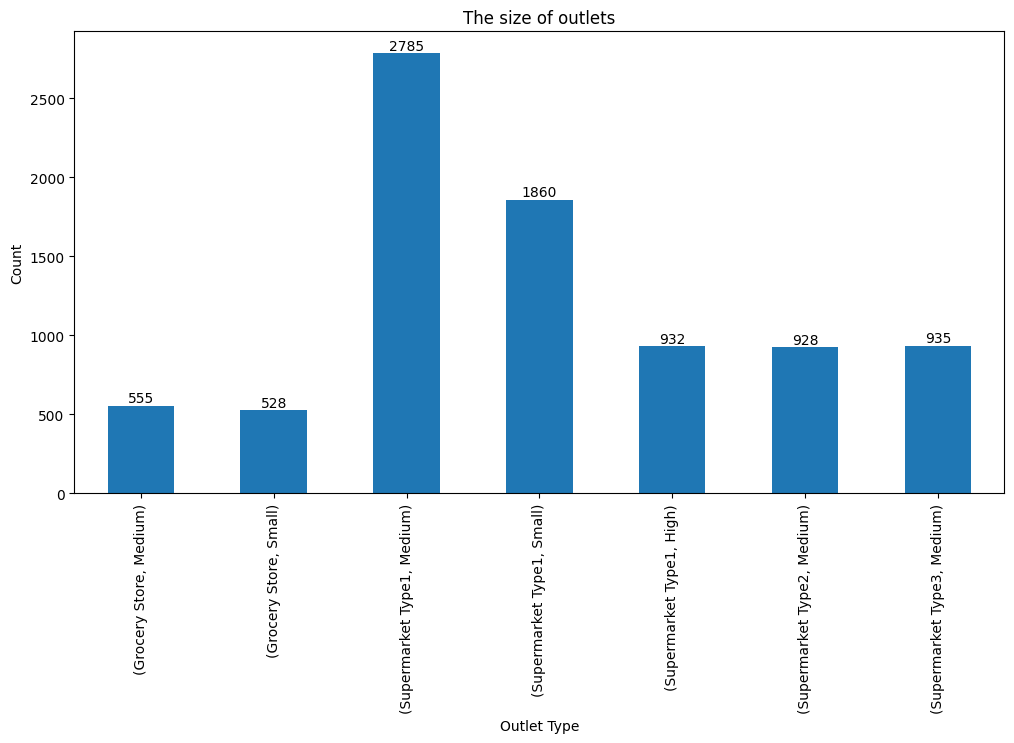

In [37]:
plt.figure(figsize=(12, 6))
ax = sum_by_category1.plot(kind='bar')
for i, v in enumerate(sum_by_category1):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title("The size of outlets")
plt.xlabel("Outlet Type")
plt.ylabel("Count")

# Display the plot
plt.show()


So, it seems like Our target variable have many outliers . Lets use describe function again to see the range of values for the outlet sales variable 

In [38]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


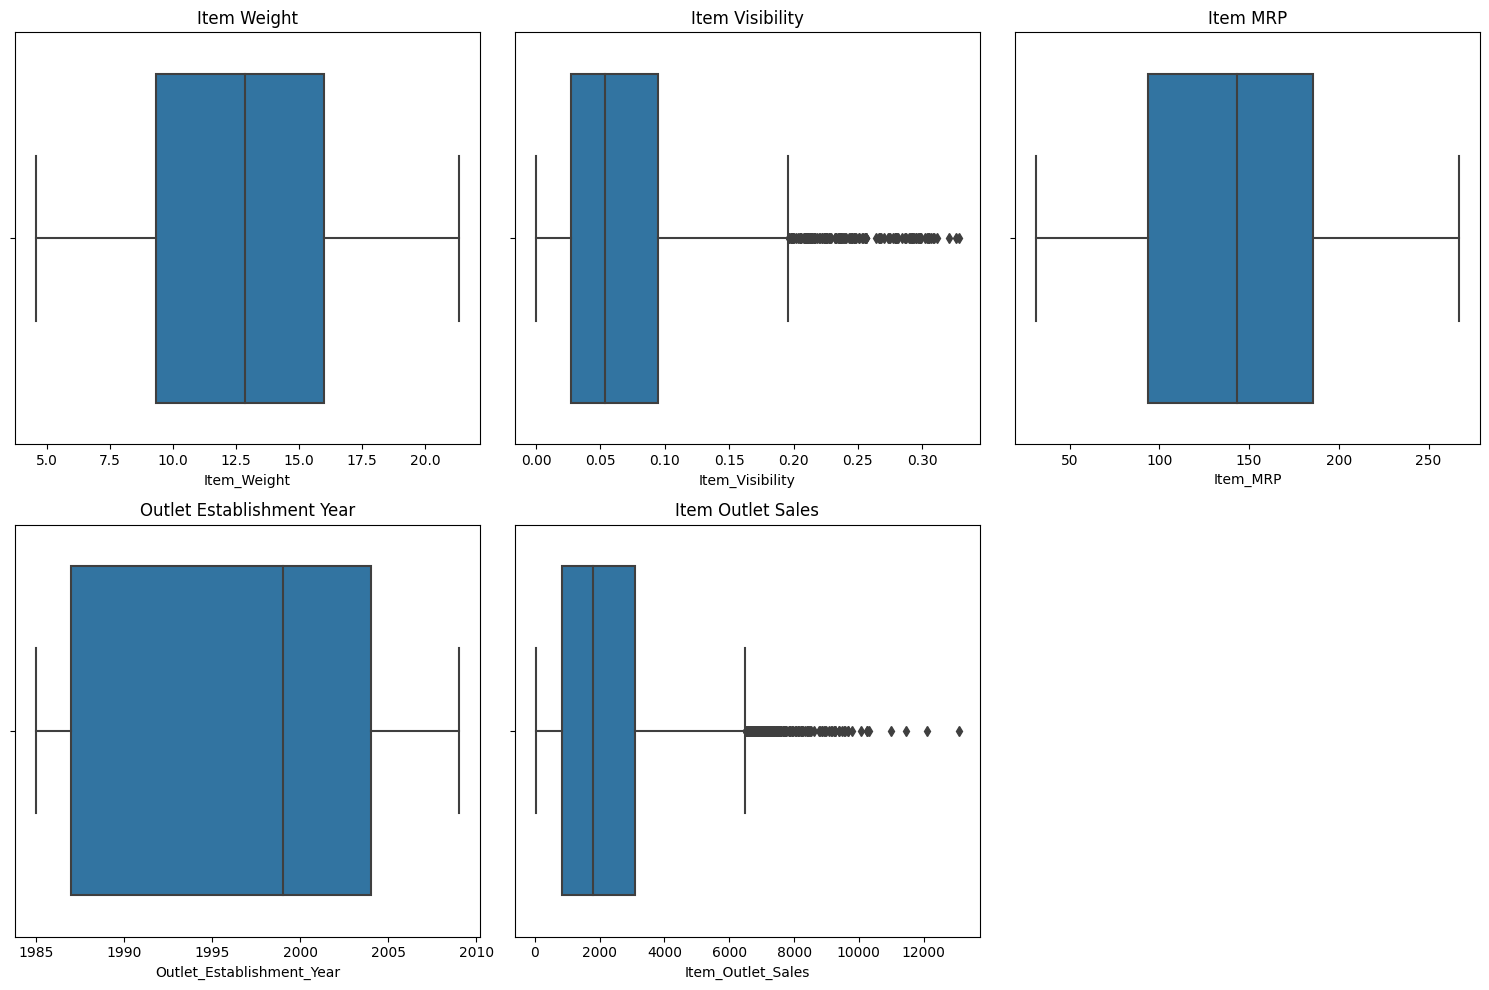

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x=train['Item_Weight'], ax=axes[0, 0])
sns.boxplot(x=train['Item_Visibility'], ax=axes[0, 1])
sns.boxplot(x=train['Item_MRP'], ax=axes[0, 2])
sns.boxplot(x=train['Outlet_Establishment_Year'], ax=axes[1, 0])
sns.boxplot(x=train['Item_Outlet_Sales'], ax=axes[1, 1])

fig.delaxes(axes[1, 2])

axes[0, 0].set_title('Item Weight')
axes[0, 1].set_title('Item Visibility')
axes[0, 2].set_title('Item MRP')
axes[1, 0].set_title('Outlet Establishment Year')
axes[1, 1].set_title('Item Outlet Sales')

plt.tight_layout()
plt.show()


**We can see that "Item_Visibility" and "Item_Outlet_Sales" have many outliers**

In [40]:
train1=train.copy()

In [41]:
#Taking Log Transformation
train1['Item_Visibility_log'] = np.log(train1['Item_Visibility'])
train1['Item_Outlet_Sales_log'] = np.log(train1['Item_Outlet_Sales'])

#Square Root Transformation
train1['Item_Visibility_sqrt'] = np.sqrt(train1['Item_Visibility'])
train1['Item_Outlet_Sales_sqrt'] = np.sqrt(train1['Item_Outlet_Sales'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


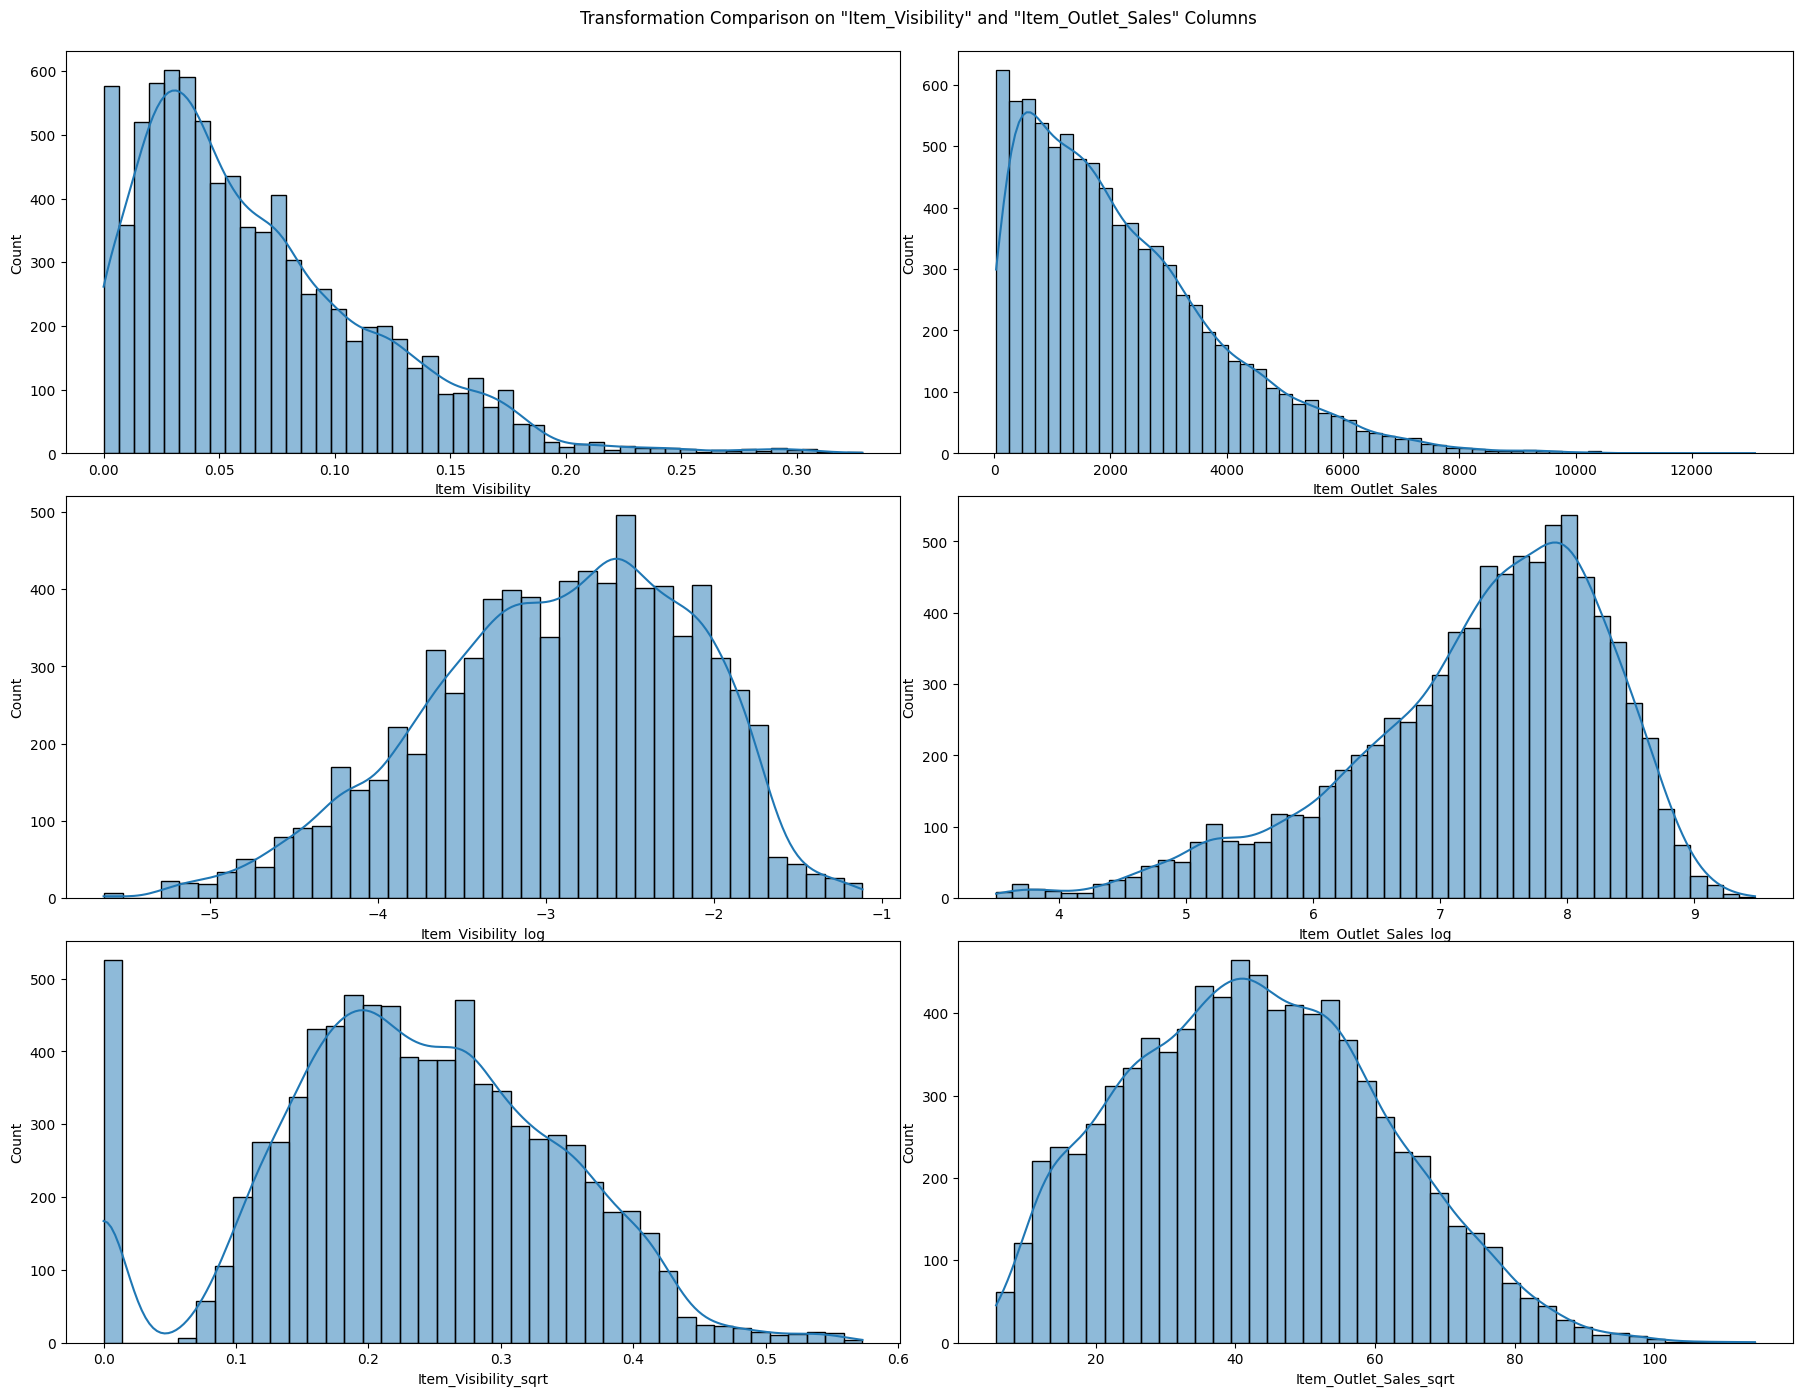

In [42]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns')
# --- Histograms of "Item_Visibility" Transformation (Column 1) ---
sns.histplot(data=train1, x='Item_Visibility', kde=True, ax=axs[0, 0])
sns.histplot(data=train1, x='Item_Visibility_log', kde=True, ax=axs[1, 0])
sns.histplot(data=train1, x='Item_Visibility_sqrt', kde=True, ax=axs[2, 0])

# --- Histograms of "Item_Outlet_Sales" Transformation (Column 2) ---
sns.histplot(data=train1, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1])
sns.histplot(data=train1, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1])
sns.histplot(data=train1, x='Item_Outlet_Sales_sqrt', kde=True, ax=axs[2, 1]);


Clearly, taking squareroot is better than log transformation. So we will apply the same to our original dataset

In [43]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
train['Item_Outlet_Sales'] = np.sqrt(train['Item_Outlet_Sales'])

In [44]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.233709,140.992782,1997.831867,42.944777
std,4.226124,0.107301,62.275067,8.371760,18.359591
min,4.555000,0.000000,31.290000,1985.000000,5.769749
25%,9.310000,0.164285,93.826500,1987.000000,28.883339
50%,12.857645,0.232230,143.012800,1999.000000,42.359544
75%,16.000000,0.307547,185.643700,2004.000000,55.689284
max,21.350000,0.573054,266.888400,2009.000000,114.398273


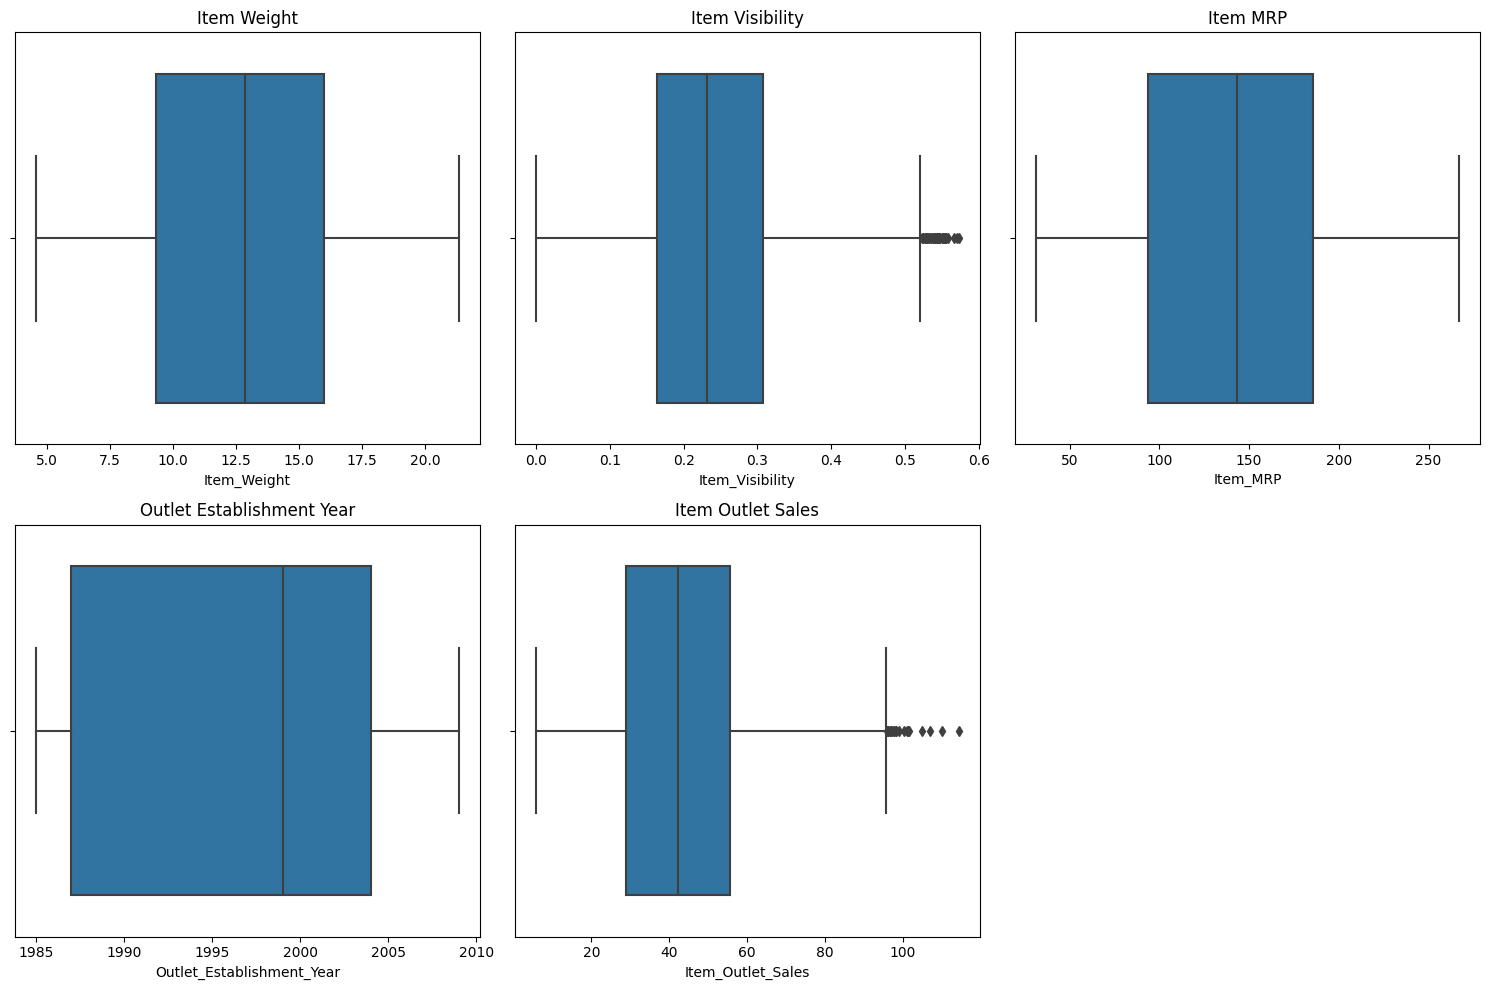

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(x=train['Item_Weight'], ax=axes[0, 0])
sns.boxplot(x=train['Item_Visibility'], ax=axes[0, 1])
sns.boxplot(x=train['Item_MRP'], ax=axes[0, 2])
sns.boxplot(x=train['Outlet_Establishment_Year'], ax=axes[1, 0])
sns.boxplot(x=train['Item_Outlet_Sales'], ax=axes[1, 1])

fig.delaxes(axes[1, 2])

axes[0, 0].set_title('Item Weight')
axes[0, 1].set_title('Item Visibility')
axes[0, 2].set_title('Item MRP')
axes[1, 0].set_title('Outlet Establishment Year')
axes[1, 1].set_title('Item Outlet Sales')

plt.tight_layout()
plt.show()

In [46]:
from scipy.stats import skew
skew(train.Item_Outlet_Sales)

0.23463468979850136

#Now, its good . We have managed to minimize the number of outliers

In [47]:
cols=train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]

<Axes: >

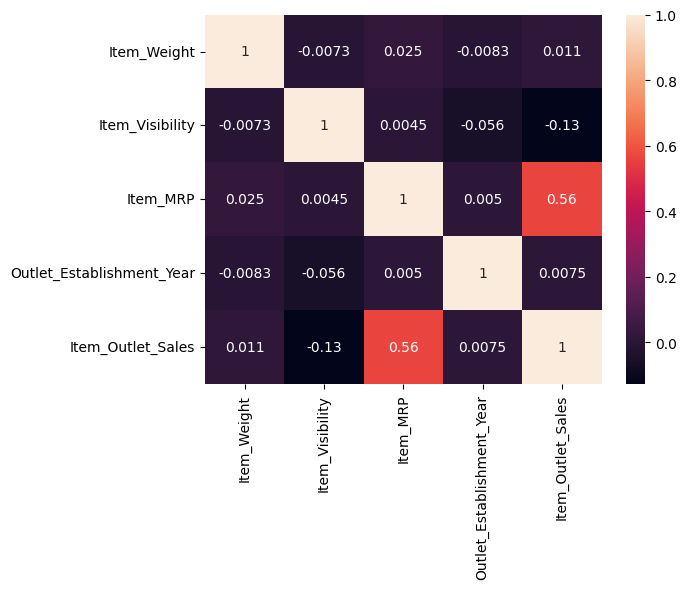

In [48]:
hm=sns.heatmap(cols.corr(),annot=True)
hm

# We can clearly see that "MRP" affects the Sales

In [49]:
train.Item_Identifier.value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [50]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,DRC01,5.92,Regular Fat,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,FDN15,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,FDX07,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947


In [51]:
train['Item_Identifier'] = train['Item_Identifier'].astype(str).str[:2]
train['Item_Identifier'] = train['Item_Identifier'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

In [52]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,Drink,5.92,Regular Fat,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,Food,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,Food,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,27.062520
4,Non-Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,31.538947


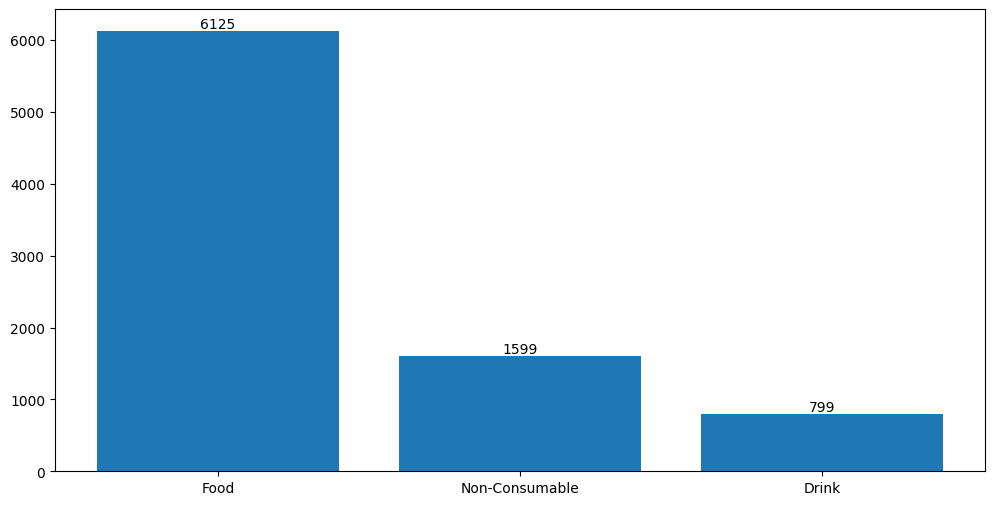

In [53]:
bar3=train['Item_Identifier'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(bar3.index,bar3.values)
for i, count in enumerate(bar3):
    plt.text(i,count,str(count),ha="center",va="bottom")

In [54]:
# Label Encoding on 'Item_Fat_Content'
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['Low Fat', 'Regular Fat'], ['0', '1'])

In [55]:
train['Age_Outlet'] = 2023-train['Outlet_Establishment_Year']

In [56]:
#  Outlet_Category
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
train['Outlet_Identifier'] = pd.cut(train['Age_Outlet'], bins=bin, labels=outlet_cat)

In [57]:
# --- Perform One-Hot Encoding ---
a = pd.get_dummies(train['Item_Identifier'], prefix = 'Item_Identifier')
b = pd.get_dummies(train['Outlet_Identifier'], prefix = 'Outlet_Identifier')
c = pd.get_dummies(train['Outlet_Size'], prefix = 'Outlet_Size')
d = pd.get_dummies(train['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
e = pd.get_dummies(train['Outlet_Type'], prefix = 'Outlet_Type')

a = a.astype(int)
b = b.astype(int)
c = c.astype(int)
d = d.astype(int)
e = e.astype(int)

# --- Concat w/ Main Dataframe ---
frames = [train, a, b, c, d, e]
train = pd.concat(frames, axis = 1)

In [58]:
train = train.drop(columns = ['Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier', 'Outlet_Identifier'])

In [59]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age_Outlet,Item_Identifier_Drink,Item_Identifier_Food,Item_Identifier_Non-Consumable,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.126678,249.8092,1999,61.115775,24,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,1,0.138846,48.2692,2009,21.057607,14,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0,0.129461,141.6180,1999,45.795961,24,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,27.062520,25,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,31.538947,36,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [60]:
train.shape

(8523, 23)

**For test dataset apply the same preprocessing**

In [61]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [62]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

test['Item_Fat_Content'].replace({'Regular':"Regular Fat"},inplace=True)

In [63]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [64]:
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

In [65]:
test['Item_Identifier'] = test['Item_Identifier'].astype(str).str[:2]
test['Item_Identifier'] = test['Item_Identifier'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

In [66]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['Low Fat', 'Regular Fat'], ['0', '1'])
test['Age_Outlet'] = 2023-test['Outlet_Establishment_Year']
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
test['Outlet_Identifier'] = pd.cut(test['Age_Outlet'], bins=bin, labels=outlet_cat)
# --- Perform One-Hot Encoding ---
d = pd.get_dummies(test['Item_Identifier'], prefix = 'Item_Identifier')
e = pd.get_dummies(test['Outlet_Identifier'], prefix = 'Outlet_Identifier')
f = pd.get_dummies(test['Outlet_Size'], prefix = 'Outlet_Size')
g = pd.get_dummies(test['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
h = pd.get_dummies(test['Outlet_Type'], prefix = 'Outlet_Type')

d = d.astype(int)
e = e.astype(int)
f = f.astype(int)
g = g.astype(int)
h = h.astype(int)

# --- Concat w/ Main Dataframe ---
frames = [test, d,e,f,g,h]
test = pd.concat(frames, axis = 1)


test = test.drop(columns = ['Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Identifier', 'Outlet_Identifier'])

In [67]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Age_Outlet',
       'Item_Identifier_Drink', 'Item_Identifier_Food',
       'Item_Identifier_Non-Consumable', 'Outlet_Identifier_New Outlet',
       'Outlet_Identifier_Moderate Outlet', 'Outlet_Identifier_Old Outlet',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [68]:
train.shape

(8523, 23)

In [69]:
test.shape

(5681, 22)

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

In [71]:
X_train = train.drop('Item_Outlet_Sales',axis= 1)
y_train = train["Item_Outlet_Sales"]

In [77]:
linear_reg = LinearRegression()
r_reg=Ridge()
rf_reg = RandomForestRegressor()
#xgb_reg = XGBRegressor()

# Fit the models to the training data
linear_reg.fit(X_train, y_train)
r_reg.fit(X_train,y_train)
rf_reg.fit(X_train, y_train)
#xgb_reg.fit(X_train, y_train)


RandomForestRegressor()

In [78]:
# Use the trained models to predict the target variable in the test dataset
linear_reg_test_pred = linear_reg.predict(test)
r_reg_test_pred=r_reg.predict(test)
rf_reg_test_pred = rf_reg.predict(test)
#xgb_reg_test_pred = xgb_reg.predict(test_data)

In [82]:
linear_reg_test_pred

array([40.578125  , 37.53125   , 33.67578125, ..., 40.3828125 ,
       58.90625   , 34.3671875 ])

In [83]:
r_reg_test_pred

array([40.33790704, 37.7669392 , 33.67034152, ..., 40.37054842,
       59.14317903, 34.35883198])

In [84]:
rf_reg_test_pred

array([37.3337694 , 35.96490305, 27.25228039, ..., 41.94748549,
       67.78983396, 37.47617642])